# Linear Regression

## machineLearning supervised Learning
### Classfication vs Regression
Knn, DecisionTree,svn
미리 학습을 시켜준곳에 input을 넣으면 output을 보인다
<img src="Image/LinearRegression_1.png" style="width:600px;height:400px;">

## Regression
사람의 무게를 줄때, 키를 추측하는것. 1차함수형태 : y = ax+b <br>
#### Error - differentce between prediction and real value (실제 있는 점과 선상의 있는 점의 차이)
#### Square Error : Error^2
장점
- 눈에 더 쉽게 보인다. 
- 에러가 조금이라도 있어도 큰곳과 작은곳을 쉽게 비교할수있다. 
- 계산이 더 쉽다.
- 예측을 조금더 실제값에 가깝게 예측할수있다. 

### How can you code to find best linear equation?

#### Find Linear Equation has Least Mean Square(LMS) Error
LMS Error (Least Mean Square Error)
<img src="Image/LinearRegression_2.png" style="width:600px;height:400px;">
Mean Square Error = how to find least mean square? -> 직선을 긋는 방법? = Gradient Decent!
= Square Error 를 평균낸 값.

Mean Square Error = Cost Function J(θ): 비용함수(실제, 가설값의 차이) = Objective function

#### Gradient Decent(θ 값을 찾기 다음의 θ값을 지금의 θ값으로 찾기) (y=ax 꼴)
<img src="Image/LinearRegression_3.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_4.png" style="width:350px;height:250px;display:inline-block;">

θ = parameter <br>
α = running rate <br>
local minimum일 때까지 계속 진행 (θ가 0에 가까워 지도록 step 반복)

### Q&A1. What if we have more theta?  (y=ax+b 꼴)
h(x) = θ1x + θ0
<img src="Image/LinearRegression_5.png" style="width:600px;height:400px;">


### Q&A2. How to decide learning rate? 너무 작게 or 너무 높게 잡지 않는다.
<img src="Image/LinearRegression_6.png" style="width:600px;height:400px;">

너무 작으면? 시간이 너무 오래걸린다. (minimum으로 내려가는데..)      너무 높으면? 최저점으로 수렴하지 않을수도 있다. 

## Linear Regression's Hypothesis and cost

training data 를 통해서 regression model을 만든다
<img src="Image/LinearRegression_Deep1.png" style="width:600;height:500px;display:inline-block;">
<img src="Image/LinearRegression_Deep2.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep3.png" style="width:350px;height:250px;display:inline-block;">
(Linear)Hypothsis: Linear한 형태라고 가정하고 data를 통해 모델을 만드는것
data 에 맞는 Linear한 일차함수를 찾는 것 = 학습을 하는 것. H(x) = Wx+b 의 형태 <br>
W,b에 값에 따라 다른 형태의 Linear한 형태로 나타날것이다.

Cost Function = Loss Function -> 보통 distance 를 계산 할때는 차이를 제곱한다. <br>
-> 장점. 일정하게 양수로 표현 가능하다. 차이가 클때 더 값들이 커져서 차이를 작게 만들수있다. 

Goal : Minimize cost -> minimize cost(W,b) : (주어진 식에서)Weight,bias를 최소화하는 다양한 알고리즘이 있다.

## Implementation LinearRegression using Tensorflow

### 1. Build graph using TF operation

In [16]:
# Lab 2 Linear Regression
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# X and Y data 
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
# Variable: Tensorflow가 사용하는 Var이다. Tensorflow가 실행되면서 자체적으로 변경되는 값이다. (Trainable)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b 가설
hypothesis = x_train * W + b
#-----------------------------------------------------------------------------------
# cost function / loss function 구현
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize 그래프 구현 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session. 실행 
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line sess를 통해 train Node를 실행을 시킨다. (2000번)을 20번에 1번씩 실행
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

# Learns best fit W:[ 1.],  b:[ 0.] 가 되어야 한다. 

'''
0 2.82329 [ 2.12867713] [-0.85235667]
20 0.190351 [ 1.53392804] [-1.05059612]
40 0.151357 [ 1.45725465] [-1.02391243]
...
1920 1.77484e-05 [ 1.00489295] [-0.01112291]
1940 1.61197e-05 [ 1.00466311] [-0.01060018]
1960 1.46397e-05 [ 1.004444] [-0.01010205]
1980 1.32962e-05 [ 1.00423515] [-0.00962736]
2000 1.20761e-05 [ 1.00403607] [-0.00917497]
'''


0 19.741056 [2.5211456] [1.223675]
20 0.20683064 [0.96952546] [0.5150542]
40 0.027163653 [0.8300204] [0.42885017]
60 0.0232136 [0.82458895] [0.40279236]
80 0.021069752 [0.8315548] [0.38330045]
100 0.019135771 [0.8393493] [0.36523327]
120 0.017379422 [0.84688777] [0.3480636]
140 0.015784264 [0.8540824] [0.3317054]
160 0.014335536 [0.86093986] [0.3161164]
180 0.013019753 [0.8674753] [0.30126008]
200 0.011824737 [0.8737034] [0.2871019]
220 0.010739415 [0.8796389] [0.27360916]
240 0.009753711 [0.8852954] [0.26075056]
260 0.0088584805 [0.89068604] [0.2484963]
280 0.00804541 [0.8958235] [0.23681787]
300 0.007306974 [0.9007193] [0.22568832]
320 0.006636303 [0.90538514] [0.21508183]
340 0.006027207 [0.90983164] [0.20497379]
360 0.0054740054 [0.9140693] [0.19534075]
380 0.004971574 [0.91810775] [0.18616046]
400 0.004515266 [0.9219563] [0.1774116]
420 0.0041008424 [0.9256241] [0.16907391]
440 0.0037244577 [0.92911947] [0.1611281]
460 0.0033826053 [0.9324506] [0.15355566]
480 0.0030721312 [0.9356

'\n0 2.82329 [ 2.12867713] [-0.85235667]\n20 0.190351 [ 1.53392804] [-1.05059612]\n40 0.151357 [ 1.45725465] [-1.02391243]\n...\n1920 1.77484e-05 [ 1.00489295] [-0.01112291]\n1940 1.61197e-05 [ 1.00466311] [-0.01060018]\n1960 1.46397e-05 [ 1.004444] [-0.01010205]\n1980 1.32962e-05 [ 1.00423515] [-0.00962736]\n2000 1.20761e-05 [ 1.00403607] [-0.00917497]\n'

### 2. Using Placeholders

In [12]:
# Lab 2 Linear Regression
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# Try to find values for W and b to compute y_data = W * x_data + b
# We know that W should be 1 and b should be 0
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Now we can use X and Y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/36693740/
# 실제 값을 직접 주지않고 x,y값을 placeholder라고 줄수있다. 
X = tf.placeholder(tf.float32, shape=[None]) 
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

# Learns best fit W:[ 1.],  b:[ 0]
'''
...
1980 1.32962e-05 [ 1.00423515] [-0.00962736]
2000 1.20761e-05 [ 1.00403607] [-0.00917497]
'''

# Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

'''
[ 5.0110054]
[ 2.50091505]
[ 1.49687922  3.50495124]
'''


# Fit the line with new training data (train이라는 노드를 생성할때, 값을 넘겨줄수있다.)
# train 시킬때, 직접값을 주지않고 feed_dict로 넘겨 줄수있다. (placeholder 이용)
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X: [1, 2, 3, 4, 5],
                            Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

# Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

'''
1960 3.32396e-07 [ 1.00037301] [ 1.09865296]
1980 2.90429e-07 [ 1.00034881] [ 1.09874094]
2000 2.5373e-07 [ 1.00032604] [ 1.09882331]
[ 6.10045338]
[ 3.59963846]
[ 2.59931231  4.59996414]
'''

0 6.9983544 [2.1911864] [-0.23809919]
20 0.11629844 [1.3543705] [-0.5703999]
40 0.04905046 [1.263366] [-0.5763002]
60 0.044035435 [1.243909] [-0.55233043]
80 0.039989036 [1.2317722] [-0.5266694]
100 0.036318634 [1.2208154] [-0.50194603]
120 0.032985162 [1.2104318] [-0.47835913]
140 0.029957622 [1.2005416] [-0.45587823]
160 0.02720801 [1.1911169] [-0.43445364]
180 0.024710773 [1.1821351] [-0.41403598]
200 0.02244273 [1.1735754] [-0.39457783]
220 0.02038282 [1.165418] [-0.37603408]
240 0.018512012 [1.1576439] [-0.3583618]
260 0.016812906 [1.1502353] [-0.3415202]
280 0.015269752 [1.143175] [-0.32546997]
300 0.01386822 [1.1364461] [-0.31017405]
320 0.012595359 [1.1300336] [-0.29559702]
340 0.011439276 [1.1239226] [-0.281705]
360 0.010389345 [1.1180986] [-0.26846594]
380 0.009435758 [1.1125484] [-0.25584906]
400 0.008569714 [1.107259] [-0.24382503]
420 0.0077831685 [1.1022185] [-0.23236619]
440 0.0070687905 [1.0974144] [-0.22144583]
460 0.0064199935 [1.0928363] [-0.21103868]
480 0.005830724

'\n1960 3.32396e-07 [ 1.00037301] [ 1.09865296]\n1980 2.90429e-07 [ 1.00034881] [ 1.09874094]\n2000 2.5373e-07 [ 1.00032604] [ 1.09882331]\n[ 6.10045338]\n[ 3.59963846]\n[ 2.59931231  4.59996414]\n'

### Outline

tensorflow 동작 그림으로 이해

<img src="Image/LinearRegression_Deep4.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep5.png" style="width:350px;height:250px;display:inline-block;">

## LinearRegression Cost minimizing Algorithm

목표: cost 를 minimize 하는 W,b를 구하는 것

### simplified hypothesis

개념
<img src="Image/LinearRegression_Deep6.png" style="width:600px;height:400px;">
bias가 없는 간단한 형태로만 나타낸다.

Gradient descent algorithm <br>
어떤 점에서 시작하던지 항상 최솟값을 찾을수있다. = 미분이용!<br>
<img src="Image/LinearRegression_Deep7.png" style="width:350px;height:250px;">
<img src="Image/LinearRegression_Deep8.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep9.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep10.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep11.png" style="width:350px;height:250px;display:inline-block;">

### Convex function


<img src="Image/LinearRegression_Deep12.png" style="width:350px;height:250px;display:inline-block;">
<img src="Image/LinearRegression_Deep13.png" style="width:350px;height:250px;display:inline-block;">
오른쪽 그림과 같은 모양이면 어떻게든 한점으로 수렴하기때문에 걱정없이 알고리즘을 수행해도 된다.

### implementation

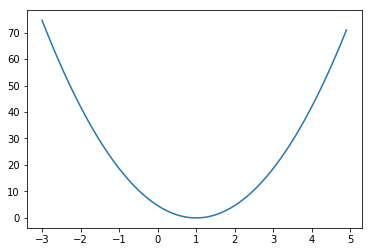

In [15]:
# Lab 3 Minimizing Cost
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()